In [32]:
# import MNIST data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from keras import regularizers

# adding a sparsity
encoding_dim = 64
input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
activity_regularizer=regularizers.l1(10e-7))(input_img)

encoded = Dense(64, activation='relu')(encoded)


#encoder = Model(input_img,encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)



autoencoder = Model(input_img, decoded)

# comiple
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.3508 - val_loss: 0.2756
Epoch 2/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.2663 - val_loss: 0.2540
Epoch 3/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.2432 - val_loss: 0.2308
Epoch 4/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.2236 - val_loss: 0.2144
Epoch 5/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2101 - val_loss: 0.2030
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.1999 - val_loss: 0.1939
Epoch 7/50
48128/60000 [=======================>......] - ETA: 0s - loss: 0.1927

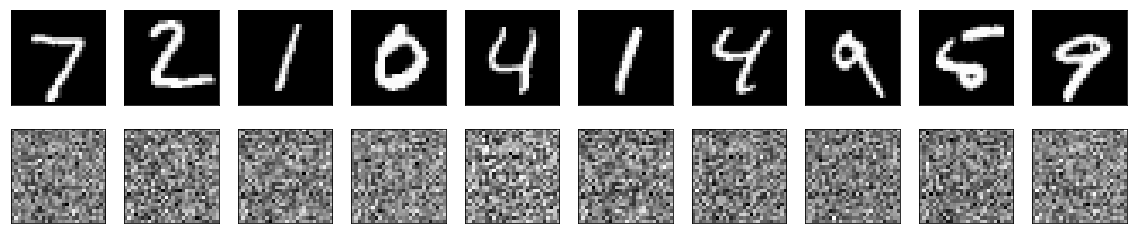

In [30]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
encoded_imgs.mean()

0.2123254